In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
np.random.seed(123)

%matplotlib inline

## 參考模型架構

In [45]:
# 參考架構
# def AND(x1,x2):
#     x = np.array([x1,x2])
#     w = np.array([0.5,0.5])
#     b = -0.7
#     tmp = np.sum(w*x) + b
#     if tmp <= 0:
#         return 0
#     else:
#         return 1

# def OR(x1,x2):
#     x = np.array([x1,x2])
#     w = np.array([0.5,0.5])
#     b = -0.2
#     tmp = np.sum(w*x) + b
#     if tmp <= 0:
#         return 0
#     else:
#         return 1

# def NAND(x1,x2):
#     x = np.array([x1,x2])
#     w = np.array([-0.5,-0.5])
#     b = 0.7
#     tmp = np.sum(w*x) +b
#     if tmp <= 0:
#         return 0
#     else:
#         return 1

# def XOR(x1,x2):
#     s1 = NAND(x1,x2)
#     s2 = OR(x1,x2)
#     y = AND(s1,s2)
#     return y

# for xs in [(0,0),(1,0),(0,1),(1,1)]:
#     y = XOR(xs[0],xs[1])
#     print(str(xs) + "->" + str(y))

## Perceptron model class

In [46]:
class Perceptron():

    def __init__(self):
        pass

    def train(self, X, y, learning_rate=0.05, n_iters=100):
        n_samples, n_features = X.shape # input X 的資料個數、input X的特徵數量

        # 初始化參數
        # ---------------------- ------------
        self.weights1 = np.random.rand(n_features,2)
        # self.weights1 = np.array([0.5,0.5,0.5,0.5]).reshape((2,2)) # <初始值比較好的版本>
        # self.weights1 = np.zeros((n_features,2)) # <權重初始都是0的版本> 
        # 2x2:
        # [ [0, 0] 
        #   [0, 0] ]

        self.bias1 = np.random.rand(1,2)
        # self.bias1 = np.array([-0.7,-0.2]).reshape((1,2)) # <初始值比較好的版本>
        # self.bias1 = np.zeros((1, 2)) # <權重初始都是0的版本>
        # 1x2:
        # [0, 0]

        self.weights2 = np.random.rand(n_features,2)
        # self.weights2 = np.array([-0.5,-0.5,-0.5,-0.5]).reshape((2,2)) # <初始值比較好的版本>

        # self.weights2 = np.zeros((n_features,2)) # # <權重初始都是0的版本>
        # 2x1:
        # [ [0] 
        #   [0] ]
        self.bias2 = np.random.rand(1, 2)
        # self.bias2 = np.array([0.7,0.7]).reshape((1,2)) # <初始值比較好的版本>
        # self.bias2 = np.zeros((1, 2)) # <權重初始都是0的版本>
        # 1x1:
        # [0]

        # Training
        # ----------------------------------
        middle_output = None
        for i in range(n_iters):
            batch_size = X.shape[0]
            layer1_output_tmp = np.dot(X, self.weights1) + self.bias1
            layer1_output_a = self.sigmoid(layer1_output_tmp) # 為第一層的輸出結果

            middle_output = layer1_output_a # 記錄起來最後作圖要用

            layer2_output_tmp = np.dot(layer1_output_a, self.weights2) + self.bias2 # 為第二層的輸出結果
            # layer2_output_a = self.sigmoid(layer2_output_tmp) # <兩層sigmoid的版本>
            t = self.softmax(layer2_output_tmp) # 經過softmax function變機率值
            
            # Backpropagation 倒傳遞演算法
            # ----------------------------------
            # backward 以均方差函數Mean Squared Error為例 dL/dy' = y' - y，其中 y' 為訓練出來的結果，y 為標準答案
            dy = (t - y) / batch_size
            # dy = (layer2_output_a - y) / batch_size # <兩層sigmoid的版本>
            # d_sigmoid2 = dy * self.sigmoid_grad(layer2_output_tmp) # 穿越回第二個sigmoid之前 # <兩層sigmoid的版本>
            d_affine2_b = np.sum(dy) * 1 # 先算第二個affine層的L偏微分b # Why要.sum與批次有關
            d_affine2_w = np.dot(layer1_output_a.T, dy)
            d_affine2_a = np.dot(dy, self.weights2.T) # 這個a才是繼續往下傳遞的
            d_sigmoid1 = self.sigmoid_grad(layer1_output_tmp) * d_affine2_a
            d_affine1_b = np.sum(d_sigmoid1) * 1 # Why要.sum與批次有關
            d_affine1_w = np.dot(X.T, d_sigmoid1)
            

            # 輸出算出來各層的 Gradient值 
            # ----------------------------------
            # print(f"dy:{dy}")
            # print(f"d_sigmoid2:{d_sigmoid2}") # <兩層sigmoid的版本>
            # print(f"d_affine2_b:{d_affine2_b}")
            # print(f"d_affine2_w:{d_affine2_w}")
            # print(f"d_affine2_w:{d_affine2_a}")
            # print(f"d_sigmoid1:{d_sigmoid1}")
            # print(f"d_affine1_b:{d_affine1_b}")
            # print(f"d_affine1_w:{d_affine1_w}")

            # 調整參數
            # ----------------------------------
            self.weights2 -= learning_rate * d_affine2_w
            self.bias2 -= learning_rate * d_affine2_b
            self.weights1 -= learning_rate * d_affine1_w
            self.bias1 -= learning_rate * d_affine1_b

            # 輸出每一次訓練出的參數
            # ----------------------------------
            print(f"------Training round {i}------")
            print("self.weights1:")
            print(self.weights1)
            print("self.bias1:")
            print(self.bias1)
            print("self.weights2:")
            print(self.weights2)
            print("self.bias2:")
            print(self.bias2)
            print("")
        return self.weights1, self.bias1, self.weights2, self.bias2, middle_output

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))  

    def sigmoid_grad(self, x): # x 為 input sigmoid function 的參數
        return (1.0 - self.sigmoid(x)) * self.sigmoid(x)

    def predict(self, X):
        layer1_output_tmp = np.dot(X, self.weights1) + self.bias1
        layer1_output_a = self.sigmoid(layer1_output_tmp) # 為第一層的輸出結果
        layer2_output_tmp = np.dot(layer1_output_a, self.weights2) + self.bias2 # 為第二層的輸出結果
        # layer2_output_a = self.sigmoid(layer2_output_tmp) 
        t = self.softmax(layer2_output_tmp) # <兩層sigmoid的版本>
        return t
    
    def softmax(self, x):
        if x.ndim == 2:
            x = x.T
            x = x - np.max(x, axis=0)
            y = np.exp(x) / np.sum(np.exp(x), axis=0)
            return y.T 

        x = x - np.max(x)
        return np.exp(x) / np.sum(np.exp(x))

    # 二維系統維分
    # def numerical_gradient(self, f, X):
    #     h = 1e-4
    #     grad = np.zeros_like(X)

    #     for idx in range(X.size):
    #         tmp_val = X[idx]
    #         X[idx] = float(tmp_val) + h
    #         fxh1 = f(X) # f(x+h)
    #         X[idx] = tmp_val - h
    #         fxh2 = f(X) # f(x-h)
    #         grad[idx] = (fxh1 - fxh2) / (2*h)
    #         X[idx] = tmp_val # 恢復原值
    #     return grad 

    # loss_function
    # def croo_entry_error(self, y, a):
    #     delta = 1e-7
    #     return -np.sum(a*np.log(y+delta))

    # def mean_squared_error(self, y, a):
    #     return 0.5*np.sum((y-a)**2)

## 生成訓練資料集與測試資料集

In [47]:
# 訓練資料集
# ------------------------------------
# 生成train資料
x1 = np.array([0,0])
x2 = np.array([0,1])
x3 = np.array([1,0])
x4 = np.array([1,1])
X = np.array([x1,x2,x3,x4])

# 生成train答案(類別機率答案)
y1 = np.array([1,0])
y2 = np.array([0,1])
y3 = np.array([0,1])
y4 = np.array([1,0])
y = np.array([y1,y2,y3,y4])

# 生成train答案(類別答案)
y_answer = np.array(list())
for i in range(len(y)):
    if y[i][0] > y[i][1]: # y為機率答案
        y_answer = np.append(y_answer,[0])
    else:
        y_answer = np.append(y_answer,[1])

# 測試資料集
# ------------------------------------
X_test = np.random.randint(0,2,size=(100, 2)) # 100筆 每筆兩個值
y_test = np.array(list())

# 生成test答案(類別答案)
for i in range(len(X_test)):
    if X_test[i][0] == X_test[i][1]: 
        y_test = np.append(y_test,[0])
    else:
        y_test = np.append(y_test,[1])

## Training data set 作圖

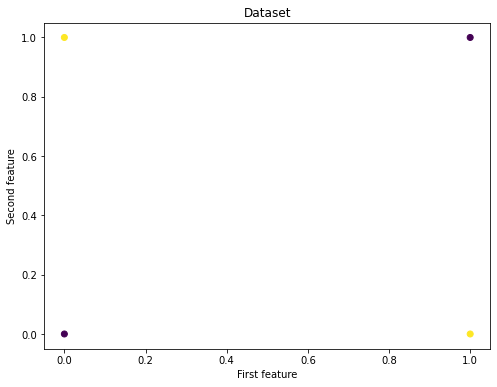

In [48]:
fig = plt.figure(figsize=(8,6)) 
plt.scatter(X[:,0], X[:,1], c=y_answer)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

## Initialization and training the mode

In [49]:
p = Perceptron()
weights1_trained, bias1_trained, weights2_trained, bias2_trained, middle_output = p.train(X, y, learning_rate=0.5, n_iters=5000)

print("End")

串流輸出內容已截斷至最後 5000 行。
[[-1.77002411 -1.33419001]]
self.weights2:
[[ 13.44170315 -12.14433069]
 [ -5.05925663   6.33457138]]
self.bias2:
[[0.21548145 0.11684824]]

------Training round 4584------
self.weights1:
[[1.01866072 7.48895764]
 [1.01864983 7.48627983]]
self.bias1:
[[-1.76981927 -1.33398517]]
self.weights2:
[[ 13.44438634 -12.14701388]
 [ -5.06046759   6.33578233]]
self.bias2:
[[0.21548145 0.11684824]]

------Training round 4585------
self.weights1:
[[1.0185303  7.4890912 ]
 [1.01851941 7.48641375]]
self.bias1:
[[-1.76961469 -1.3337806 ]]
self.weights2:
[[ 13.44706865 -12.14969619]
 [ -5.06167809   6.33699283]]
self.bias2:
[[0.21548145 0.11684824]]

------Training round 4586------
self.weights1:
[[1.01840003 7.48922472]
 [1.01838916 7.48654762]]
self.bias1:
[[-1.76941038 -1.33357628]]
self.weights2:
[[ 13.44975008 -12.15237762]
 [ -5.06288814   6.33820289]]
self.bias2:
[[0.21548145 0.11684824]]

------Training round 4587------
self.weights1:
[[1.01826992 7.48935817]
 [1.01825905 

## Testing

### 自己的小測試

In [50]:
# 自己的Testing
list1 = [[0,0],[0,1],[1,0],[1,1]]

for i in list1:
    answer = p.predict(i)
    print(answer)
    if (answer[0][0] > answer[0][1]):
        print("Output is 0")
    else:
        print("Output is 1")


[[0.8394091 0.1605909]]
Output is 0
[[0.03947708 0.96052292]]
Output is 1
[[0.03947696 0.96052304]]
Output is 1
[[0.96487564 0.03512436]]
Output is 0


### Accuracy




In [51]:
y_p_train = p.predict(X) # 訓練資料的準確度
# 以下for迴圈將類別機率 轉換成 類別答案
y_p_train_answer = [0]*len(y_p_train)
for i in range(len(y_p_train)):
    if y_p_train[i][0] < y_p_train[i][1]:
        y_p_train_answer[i] = 1

print(f"training accuracy: {100 - np.mean(np.abs(y_p_train_answer - y_answer)) * 100}%")

y_p_test = p.predict(X_test) # 測試資料的準確度
# 以下for迴圈將類別機率 轉換成 類別答案
y_p_test_answer = [0]*100
for i in range(len(y_p_test)):
    if y_p_test[i][0] < y_p_test[i][1]:
        y_p_test_answer[i] = 1

print(f"test accuracy: {100 - np.mean(np.abs(y_p_test_answer - y_test)) * 100}%")

training accuracy: 100.0%
test accuracy: 100.0%


## Visualize decision boundary

In [52]:
def plot_2lines(X, y, weights, bias, weights2, bias2):
    slope1 = - weights[0][0]/ weights[1][0]
    slope2 = - weights[0][1]/ weights[1][1]

    slope3 = - weights2[0][0]/ weights2[1][1]
    slope4 = - weights2[0][1]/ weights2[1][1]

    intercept1 = - bias[0][0]/weights[0][1]
    intercept2 = - bias[0][1]/weights[1][1]

    intercept3 = - bias2[0][0]/weights2[1][1]
    intercept4 = - bias2[0][0]/weights2[1][1]

    x_hyperplane = np.linspace(-2,2,2)
    y_hyperplane1 = slope1 * x_hyperplane + intercept1
    y_hyperplane2 = slope2 * x_hyperplane + intercept2
    y_hyperplane3 = slope3 * x_hyperplane + intercept3
    y_hyperplane4 = slope4 * x_hyperplane + intercept4

    
    fig = plt.figure(figsize=(8,6))
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.plot(x_hyperplane, y_hyperplane1, '-',color="red")
    plt.plot(x_hyperplane, y_hyperplane2, '-',color="red")
    plt.plot(x_hyperplane, y_hyperplane3, '-',color="blue")
    plt.plot(x_hyperplane, y_hyperplane4, '-',color="blue")

    plt.title("Dataset and fitted decision hyperplane")
    plt.xlabel("First feature")
    plt.ylabel("Second feature")
    plt.show()

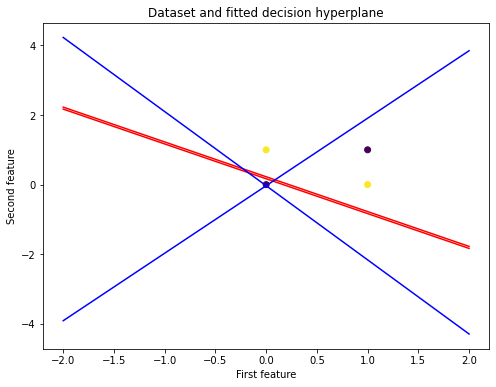

In [53]:
a = [0,0,0,0]
for i in range(len(y)):
    if y[i][0] < y[i][1]:
        a[i] = 1

plot_2lines(X, a, weights1_trained, bias1_trained, weights2_trained, bias2_trained)
